In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini project/ml/AgriData_Dist.xls - Sheet1.csv")
crop_df.head(5)
print(crop_df.shape)

(106, 51)


# DATA TRANSFORMATION

## TRANSFORMING FOR CREATING NEW DISTRICT ATTRIBUTE

In [ ]:
print(crop_df.columns)

Index(['CROPS', 'TYPE_OF_CROP', 'SOIL', 'SOIL_PH_LOW', 'SOIL_PH_HIGH',
       'CROPDURATION_MIN', 'CROPDURATION_MAX', 'MIN_TEMP', 'MAX_TEMP',
       'TYPE_OF _WATERSOURCE', 'WATER REQUIRED_MIN', 'WATERREQUIRED_MAX',
       'RELATIVE_HUMIDITY_MIN', 'RELATIVE_HUMIDITY_MAX',
       'DISTRICT WISE CROP AVAILABILITY', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')


In [ ]:
df=crop_df.iloc[1:].copy()
district_columns = list(x.strip() for x in crop_df.iloc[0,14:])
other_columns=list(crop_df.columns[:14])

intermediate_df = pd.DataFrame(df.iloc[:, :].values, columns=other_columns+district_columns)
intermediate_df.head(3)

,CROPS,TYPE_OF_CROP,SOIL,SOIL_PH_LOW,SOIL_PH_HIGH,CROPDURATION_MIN,CROPDURATION_MAX,MIN_TEMP,MAX_TEMP,TYPE_OF _WATERSOURCE,...,THIRUCHIRAPALLI,THIRUNELVELI,THIRUPPUR,THIRUVALLUR,THIRUVANNAMALAI,THOOTHUKUDI,TIRUVARUR,VELLORE,VILLUPURAM,VIRUDHUNAGAR
0,rice,cereals,Alluvia or loamy and clayey soil,5.0,8.0,150.0,150.0,20.0,40.0,both,...,1,1,0,1,1,1,1,1,1,1
1,wheat,cereals,Well Drained,6.0,7.0,80.0,90.0,21.0,24.0,both,...,0,0,0,0,1,0,0,1,0,0
2,maize,millets,temperate podzols to the leached red soils of ...,5.5,7.0,105.0,110.0,18.0,27.0,both,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
output_df = intermediate_df.melt(
    id_vars=other_columns,
    var_name='DISTRICT',
    value_name='AVAILABILITY'
)

output_df = output_df[output_df['AVAILABILITY'] != "0"]
output_df = output_df.drop(columns=['AVAILABILITY'])
print("final output shape:",output_df.shape)
output_df.head(3)

final output shape: (3437, 15)


,CROPS,TYPE_OF_CROP,SOIL,SOIL_PH_LOW,SOIL_PH_HIGH,CROPDURATION_MIN,CROPDURATION_MAX,MIN_TEMP,MAX_TEMP,TYPE_OF _WATERSOURCE,WATER REQUIRED_MIN,WATERREQUIRED_MAX,RELATIVE_HUMIDITY_MIN,RELATIVE_HUMIDITY_MAX,DISTRICT
2,maize,millets,temperate podzols to the leached red soils of ...,5.5,7.0,105.0,110.0,18.0,27.0,both,500.0,800.0,60.0,85.0,ARIYALUR
3,sorghum,millets,well-drained loamy soils,6.0,7.5,95.0,105.0,15.0,40.0,both,450.0,650.0,90.0,100.0,ARIYALUR
4,Pearl millet,millets,"clay, clay loam, or sandy loam soils",5.5,7.5,75.0,85.0,12.0,45.0,both,350.0,500.0,80.0,95.0,ARIYALUR


In [ ]:
print("crop duration")
min_value = output_df['CROPDURATION_MIN'].min()
print("Minimum value:", min_value)
max_value = output_df['CROPDURATION_MAX'].max()
print("Maximum value:", max_value)

print("soil ph")
min_value = output_df['SOIL_PH_HIGH'].min()
print("Minimum value:", min_value)
max_value = output_df['SOIL_PH_LOW'].max()
print("Maximum value:", max_value)

print("temperature")
min_value = output_df['MIN_TEMP'].min()
print("Minimum value:", min_value)
max_value = output_df['MAX_TEMP'].max()
print("Maximum value:", max_value)

print('water required')
min_value = output_df['WATER REQUIRED_MIN'].min()
print("Minimum value:", min_value)
max_value = output_df['WATERREQUIRED_MAX'].max()
print("Maximum value:", max_value)

print("humidity")
min_value = output_df['RELATIVE_HUMIDITY_MIN'].min()
print("Minimum value:", min_value)
max_value = output_df['RELATIVE_HUMIDITY_MAX'].max()
print("Maximum value:", max_value)




crop duration
Minimum value: 12.0
Maximum value: 1095.0
soil ph
Minimum value: 5.5
Maximum value: 8.5
temperature
Minimum value: 5.0
Maximum value: 47.0
water required
Minimum value: 300.0
Maximum value: 2540.0
humidity
Minimum value: 15.0
Maximum value: 100.0


## APLYING TEXT PROCESSING AND TRANSFORM SOIL ATTRIBUTE

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.DataFrame(output_df["SOIL"])

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Standardize Soil Types
soil_mapping = {
    'alluvial': 'Alluvial',
    'alluvium': 'Alluvial',
    'black': 'Black',
    'brown': 'Brown',
    'clay': 'Clay',
    'claybased': 'Clay',
    'clayey': 'Clay',
    'deep': 'Deep Loam',
    'friable': 'Friable',
    'lateritic': 'Laterite',
    'leached': 'Leached',
    'loam': 'Loamy',
    'loamy': 'Loamy',
    'moist': 'Moist',
    'grained': "Grained",
    'podzol': 'Podzol',
    'red': 'Red',
    'sandy': 'Sandy',
    'shallow': 'Shallow',
    'silty': 'Silty Loam',
    'temperate': 'Temperate Podzol',
    'welldrained': 'Well-drained',
    'well': 'Well-drained',
    'well': 'Well-drained',
    'cotton': 'Cotton',
    'alluviual': 'Alluvial',
    'Alluvia': 'Alluvial',
    'tropic': 'Tropica',

}


def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s,]', '', text)
    text = re.sub(r',', ' ', text)
    text = text.replace('Â', '')
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_words = {soil_mapping.get(word, 'Others') for word in words }
    return list(cleaned_words)

df['SOIL'] = df['SOIL'].apply(clean_text)

unique_soil_types=set(soil_mapping.values())
print(unique_soil_types)
df.head()

{'Alluvial', 'Black', 'Red', 'Well-drained', 'Clay', 'Deep Loam', 'Loamy', 'Cotton', 'Sandy', 'Silty Loam', 'Grained', 'Temperate Podzol', 'Laterite', 'Brown', 'Tropica', 'Friable', 'Shallow', 'Leached', 'Podzol', 'Moist'}


,SOIL
2,"[Temperate Podzol, Leached, Others, Tropica, P..."
3,"[Loamy, Well-drained, Others]"
4,"[Loamy, Others, Clay, Sandy]"
5,"[Others, Shallow, Black, Loamy, Red, Sandy]"
11,"[Cotton, Others, Sandy]"


In [ ]:
soil_df=df.copy()
soil_df=soil_df.reset_index(drop=True)

output_df=output_df.drop(columns=["SOIL"],axis=1)
output_df=output_df.reset_index(drop=True)

final_df=pd.concat([output_df,soil_df], axis=1)
print("final df shape", final_df.shape)
final_df.head(3)

final df shape (3437, 15)


,CROPS,TYPE_OF_CROP,SOIL_PH_LOW,SOIL_PH_HIGH,CROPDURATION_MIN,CROPDURATION_MAX,MIN_TEMP,MAX_TEMP,TYPE_OF _WATERSOURCE,WATER REQUIRED_MIN,WATERREQUIRED_MAX,RELATIVE_HUMIDITY_MIN,RELATIVE_HUMIDITY_MAX,DISTRICT,SOIL
0,maize,millets,5.5,7.0,105.0,110.0,18.0,27.0,both,500.0,800.0,60.0,85.0,ARIYALUR,"[Temperate Podzol, Leached, Others, Tropica, P..."
1,sorghum,millets,6.0,7.5,95.0,105.0,15.0,40.0,both,450.0,650.0,90.0,100.0,ARIYALUR,"[Loamy, Well-drained, Others]"
2,Pearl millet,millets,5.5,7.5,75.0,85.0,12.0,45.0,both,350.0,500.0,80.0,95.0,ARIYALUR,"[Loamy, Others, Clay, Sandy]"


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import joblib

mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df['SOIL']), columns=mlb.classes_)
joblib.dump(mlb, "mlb.pkl")

df = df.reset_index(drop=True)
df_encoded = df_encoded.reset_index(drop=True)
soil_df = pd.concat([df, df_encoded], axis=1)

print("Final df shape:", soil_df.shape)
soil_df.head(3)

Final df shape: (3437, 22)


,SOIL,Alluvial,Black,Brown,Clay,Cotton,Deep Loam,Friable,Grained,Laterite,...,Moist,Others,Podzol,Red,Sandy,Shallow,Silty Loam,Temperate Podzol,Tropica,Well-drained
0,"[Temperate Podzol, Leached, Others, Tropica, P...",0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,1,0
1,"[Loamy, Well-drained, Others]",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,"[Loamy, Others, Clay, Sandy]",0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
output_df=output_df.reset_index(drop=True)
soil_df=soil_df.reset_index(drop=True)

final_df=pd.concat([output_df,soil_df], axis=1)
print("final df shape", final_df.shape)
final_df.head(3)

final df shape (3437, 36)


,CROPS,TYPE_OF_CROP,SOIL_PH_LOW,SOIL_PH_HIGH,CROPDURATION_MIN,CROPDURATION_MAX,MIN_TEMP,MAX_TEMP,TYPE_OF _WATERSOURCE,WATER REQUIRED_MIN,...,Moist,Others,Podzol,Red,Sandy,Shallow,Silty Loam,Temperate Podzol,Tropica,Well-drained
0,maize,millets,5.5,7.0,105.0,110.0,18.0,27.0,both,500.0,...,0,1,1,1,0,0,0,1,1,0
1,sorghum,millets,6.0,7.5,95.0,105.0,15.0,40.0,both,450.0,...,0,1,0,0,0,0,0,0,0,1
2,Pearl millet,millets,5.5,7.5,75.0,85.0,12.0,45.0,both,350.0,...,0,1,0,0,1,0,0,0,0,0


## FEATURE ENGINEERING

In [ ]:
df=final_df.copy()
df['SOIL_PH_AVERAGE'] = df[['SOIL_PH_LOW', 'SOIL_PH_HIGH']].mean(axis=1)
df['CROPDURATION_AVERAGE'] = df[['CROPDURATION_MIN', 'CROPDURATION_MAX']].mean(axis=1)
df['TEMP_AVERAGE'] = df[['MIN_TEMP', 'MAX_TEMP']].mean(axis=1)
df['WATER_REQUIRED_AVERAGE'] = df[['WATER REQUIRED_MIN', 'WATERREQUIRED_MAX']].mean(axis=1)
df['RELATIVE_HUMIDITY_AVERAGE'] = df[['RELATIVE_HUMIDITY_MIN', 'RELATIVE_HUMIDITY_MAX']].mean(axis=1)

final_df = df.drop(columns=[
    'SOIL',
    'SOIL_PH_LOW', 'SOIL_PH_HIGH',
    'CROPDURATION_MIN', 'CROPDURATION_MAX',
    'MIN_TEMP', 'MAX_TEMP',
    'TYPE_OF _WATERSOURCE',
    'WATER REQUIRED_MIN', 'WATERREQUIRED_MAX',
    'RELATIVE_HUMIDITY_MIN', 'RELATIVE_HUMIDITY_MAX'
])

print(final_df.shape)
final_df.head()

(3437, 29)


,CROPS,TYPE_OF_CROP,DISTRICT,Alluvial,Black,Brown,Clay,Cotton,Deep Loam,Friable,...,Shallow,Silty Loam,Temperate Podzol,Tropica,Well-drained,SOIL_PH_AVERAGE,CROPDURATION_AVERAGE,TEMP_AVERAGE,WATER_REQUIRED_AVERAGE,RELATIVE_HUMIDITY_AVERAGE
0,maize,millets,ARIYALUR,0,0,0,0,0,0,0,...,0,0,1,1,0,6.25,107.5,22.5,650.0,72.5
1,sorghum,millets,ARIYALUR,0,0,0,0,0,0,0,...,0,0,0,0,1,6.75,100.0,27.5,550.0,95.0
2,Pearl millet,millets,ARIYALUR,0,0,0,1,0,0,0,...,0,0,0,0,0,6.5,80.0,28.5,425.0,87.5
3,ragi,millets,ARIYALUR,0,1,0,0,0,0,0,...,1,0,0,0,0,6.6,110.0,19.0,950.0,17.5
4,blackgram,pulses,ARIYALUR,0,0,0,0,1,0,0,...,0,0,0,0,0,7.15,72.5,31.0,800.0,17.5


In [ ]:
final_df.columns

Index(['CROPS', 'TYPE_OF_CROP', 'DISTRICT', 'Alluvial', 'Black', 'Brown',
       'Clay', 'Cotton', 'Deep Loam', 'Friable', 'Grained', 'Laterite',
       'Leached', 'Loamy', 'Moist', 'Others', 'Podzol', 'Red', 'Sandy',
       'Shallow', 'Silty Loam', 'Temperate Podzol', 'Tropica', 'Well-drained',
       'SOIL_PH_AVERAGE', 'CROPDURATION_AVERAGE', 'TEMP_AVERAGE',
       'WATER_REQUIRED_AVERAGE', 'RELATIVE_HUMIDITY_AVERAGE'],
      dtype='object')

In [ ]:
new_order = ['DISTRICT', 'TYPE_OF_CROP', 'SOIL_PH_AVERAGE', 'CROPDURATION_AVERAGE', 'TEMP_AVERAGE',
       'WATER_REQUIRED_AVERAGE', 'RELATIVE_HUMIDITY_AVERAGE', 'Alluvial', 'Black', 'Brown',
       'Clay', 'Cotton', 'Deep Loam', 'Friable', 'Grained', 'Laterite',
       'Leached', 'Loamy', 'Moist', 'Others', 'Podzol', 'Red', 'Sandy',
       'Shallow', 'Silty Loam', 'Temperate Podzol', 'Tropica', 'Well-drained', 'CROPS']
df = final_df[new_order]

# DATASET AUGMENTATION AND BALANCING

In [ ]:
#crops and crop_types with very less number of samples

crops=['maize', 'ragi', 'blackgram', 'greengram', 'redgram', 'soyabean', 'groundnut',
 'gingely', 'safflower', 'castor', 'sugarcane', 'tomato', 'onion', 'chillies', 'Cabbage', 'brinjal','capsicum',
 'paprika', 'pumpkin', 'snake gourd', 'ribbed gourd', 'bottle gourd',
 'bitter gourd', 'ash gourd', 'cucumber', 'watermelon', 'muskmelon',
 'chowchow', 'cluster bean','peas','carrot', 'beetroot',
 'radish', 'sweet potato', 'tapoica', 'elephant foot yam', 'curry leaf', 'celery'
 'cauliflower', 'small onion', 'Asparagus', 'Basella',
 'Lettuce', 'Mint', 'Palak','Turnip', 'jute', 'rice', 'wheat', 'samai', 'thinai', 'kudiraivali', 'sunflower',
 'cotton', 'varagu','sweet sorghum', ]

crop_type=["bulbvegetables", "colecrops","greenleafy","sugarcrops"]

In [ ]:
filtered_crops=crops
filtered_type=crop_type

filtered_df = df[df['CROPS'].isin(filtered_crops)]
filtered_df = filtered_df[~filtered_df['TYPE_OF_CROP'].isin(crop_type)]

balanced_crop_counts = filtered_df['CROPS'].value_counts()
balanced_crop_type_counts = filtered_df['TYPE_OF_CROP'].value_counts()


In [ ]:
final_df=filtered_df.copy()
print("dataset shape: ",final_df.shape)
print()

print("no crops: ",len(final_df["CROPS"].unique()))
print("crops: ",final_df["CROPS"].unique())

print(); print("--------------"); print()

print("no of crop types: ", len(final_df["TYPE_OF_CROP"].unique()))
print("crop types: ", final_df["TYPE_OF_CROP"].unique())

print(); print("--------------"); print()

print("no of districts: ", len(final_df["DISTRICT"].unique()))
print("districts: ", final_df["DISTRICT"].unique())

print(); print("--------------"); print()

print("no of soil types: ", len(final_df.columns[8:-1]))
print("soil types: ", final_df.columns[7:-1])

print(); print("--------------"); print()

print("no of climatic parameters: ", len(final_df.columns[3:7]))
print("other climatic parameters: ", final_df.columns[3:7])

print(); print("--------------"); print()

print("average crop durations: ", final_df['CROPDURATION_AVERAGE'].unique())

print(); print("--------------"); print()

crop_counts = final_df['CROPS'].value_counts().reset_index()
crop_counts.columns = ['CROP', 'Sample_Count']
print("Count for each crop:\n", crop_counts)

print(); print("--------------"); print()

crop_type_counts = final_df['TYPE_OF_CROP'].value_counts().reset_index()
crop_type_counts.columns = ['TYPE_OF_CROP', 'Sample_Count']
print("\nCount for each crop type:\n", crop_type_counts)

print(); print("--------------"); print()

district_counts = final_df['DISTRICT'].value_counts().reset_index()
district_counts.columns = ['DISTRICT', 'Sample_Count']
print("\nCount for each district:\n", district_counts)

print(); print("--------------"); print()

unique_crops_per_category = final_df.groupby('TYPE_OF_CROP')['CROPS'].nunique()
print(unique_crops_per_category)


dataset shape:  (1676, 29)

no crops:  51
crops:  ['maize' 'ragi' 'blackgram' 'greengram' 'redgram' 'soyabean' 'groundnut'
 'gingely' 'safflower' 'castor' 'sugarcane' 'sweet sorghum' 'tomato'
 'onion' 'chillies' 'brinjal' 'capsicum' 'paprika' 'pumpkin' 'snake gourd'
 'ribbed gourd' 'bottle gourd' 'bitter gourd' 'ash gourd' 'cucumber'
 'watermelon' 'muskmelon' 'chowchow' 'cluster bean' 'peas' 'carrot'
 'beetroot' 'radish' 'sweet potato' 'tapoica' 'elephant foot yam'
 'Asparagus' 'Basella' 'Lettuce' 'Mint' 'Palak' 'Turnip' 'jute' 'rice'
 'wheat' 'samai' 'thinai' 'kudiraivali' 'sunflower' 'cotton' 'varagu']

--------------

no of crop types:  9
crop types:  ['millets' 'pulses' 'oil seeds' 'sugar crops' 'vegetables' 'Root&tuber'
 'minor vegetables' 'fibre crop' 'cereals']

--------------

no of districts:  37
districts:  ['ARIYALUR' 'CAUVERY' 'CHENGLEPUT' 'COIMBATORE' 'CUDDALORE' 'DHARMAPURI'
 'DINDIGUL' 'ERODE' 'HILLY REGIONS OF SHEVROY' 'JAWAD HILLS'
 'KANCHEEPURAM' 'KANYAKUMARI' 'KARUR'

In [ ]:
# Group by 'TYPE_OF_CROP' and aggregate the 'CROPS' column
grouped = final_df.groupby('TYPE_OF_CROP')['CROPS'].unique().apply(list).reset_index()
pd.set_option('display.max_colwidth', None)
grouped

,TYPE_OF_CROP,CROPS
0,Root&tuber,"[carrot, beetroot, radish, sweet potato, tapoica, elephant foot yam]"
1,cereals,"[rice, wheat]"
2,fibre crop,"[jute, cotton]"
3,millets,"[maize, ragi, samai, thinai, kudiraivali, varagu]"
4,minor vegetables,"[Asparagus, Basella, Lettuce, Mint, Palak, Turnip]"
5,oil seeds,"[groundnut, gingely, safflower, castor, sunflower]"
6,pulses,"[blackgram, greengram, redgram, soyabean]"
7,sugar crops,"[sugarcane, sweet sorghum]"
8,vegetables,"[tomato, onion, chillies, brinjal, capsicum, paprika, pumpkin, snake gourd, ribbed gourd, bottle gourd, bitter gourd, ash gourd, cucumber, watermelon, muskmelon, chowchow, cluster bean, peas]"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
import joblib

df = filtered_df.copy()
X = df.drop(columns=["CROPS"])
y = df["CROPS"]

num_features = [
    'RELATIVE_HUMIDITY_AVERAGE', 'CROPDURATION_AVERAGE',
    'SOIL_PH_AVERAGE', 'TEMP_AVERAGE', 'WATER_REQUIRED_AVERAGE'
]

# label encoding
label_encoders = {}
for col in ['DISTRICT', 'TYPE_OF_CROP']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


# min_max_scaler
scaler = MinMaxScaler()
numerical_cols = num_features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
df = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=["CROPS"])], axis=1)


# Save LabelEncoders
for col, le in label_encoders.items():
    joblib.dump(le, f"{col}_label_encoder.pkl")

# Save MinMaxScaler
joblib.dump(scaler, "minmax_scaler.pkl")

print("Encoders and Scaler saved successfully!")
df.head(3)

Encoders and Scaler saved successfully!


,DISTRICT,TYPE_OF_CROP,SOIL_PH_AVERAGE,CROPDURATION_AVERAGE,TEMP_AVERAGE,WATER_REQUIRED_AVERAGE,RELATIVE_HUMIDITY_AVERAGE,Alluvial,Black,Brown,...,Others,Podzol,Red,Sandy,Shallow,Silty Loam,Temperate Podzol,Tropica,Well-drained,CROPS
0,0,3,0.090909,0.122003,0.475,0.169231,0.674847,0,0,0,...,1,1,1,0,0,0,1,1,0,maize
3,0,3,0.218182,0.125529,0.300,0.353846,0.000000,0,1,0,...,1,0,1,1,1,0,0,0,0,ragi
4,0,6,0.418182,0.072638,0.900,0.261538,0.000000,0,0,0,...,1,0,0,1,0,0,0,0,0,blackgram


In [ ]:
# Data augmentation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoder = LabelEncoder()
df['CROPS'] = label_encoder.fit_transform(df['CROPS'])
joblib.dump(label_encoder, "CROPS_label_encoder.pkl")

x = df.drop(columns=['CROPS'])
y = df['CROPS']

num_features = [
    'RELATIVE_HUMIDITY_AVERAGE', 'CROPDURATION_AVERAGE',
    'SOIL_PH_AVERAGE', 'TEMP_AVERAGE', 'WATER_REQUIRED_AVERAGE'
]

# Feature Sampling: Select a subset of rows for augmentation
num_samples = int(0.5 * len(x))
x_sampled = x.sample(n=num_samples, replace=True, random_state=42)
y_sampled = y.loc[x_sampled.index]

# Add Gaussian noise only to numerical columns
noise_std = 0.02
x_sampled[num_features] += np.random.normal(0, noise_std, x_sampled[num_features].shape)

# Concatenate original and augmented data
x_final = pd.concat([x, x_sampled], axis=0).reset_index(drop=True)
y_final = pd.concat([y, y_sampled], axis=0).reset_index(drop=True)

# Verify augmentation
print(f"Original dataset size: {x.shape[0]}")
print(f"Augmented dataset size: {x_final.shape[0]}")

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.3, random_state=42, stratify=y_final)
print("data augmented successfully")

Original dataset size: 1676
Augmented dataset size: 2514
data augmented successfully


In [ ]:
print(x_train.columns)
print(len(x_train.columns))


Index(['DISTRICT', 'TYPE_OF_CROP', 'SOIL_PH_AVERAGE', 'CROPDURATION_AVERAGE',
       'TEMP_AVERAGE', 'WATER_REQUIRED_AVERAGE', 'RELATIVE_HUMIDITY_AVERAGE',
       'Alluvial', 'Black', 'Brown', 'Clay', 'Cotton', 'Deep Loam', 'Friable',
       'Grained', 'Laterite', 'Leached', 'Loamy', 'Moist', 'Others', 'Podzol',
       'Red', 'Sandy', 'Shallow', 'Silty Loam', 'Temperate Podzol', 'Tropica',
       'Well-drained'],
      dtype='object')
28


In [ ]:
# balancing dataset using smote
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("dataset balanced successfully")

dataset balanced successfully


In [ ]:
x_train_resampled.head(3)

,DISTRICT,TYPE_OF_CROP,SOIL_PH_AVERAGE,CROPDURATION_AVERAGE,TEMP_AVERAGE,WATER_REQUIRED_AVERAGE,RELATIVE_HUMIDITY_AVERAGE,Alluvial,Black,Brown,...,Moist,Others,Podzol,Red,Sandy,Shallow,Silty Loam,Temperate Podzol,Tropica,Well-drained
0,25,0,0.181818,0.047955,0.325000,0.384615,1.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,21,4,0.248813,0.067023,0.407273,0.418186,0.655293,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4,8,0.363636,0.139633,0.850000,0.600000,0.582822,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(x_train_resampled.iloc[0])

pandas.core.series.Series

# HYPERPARAMETER TUNING MODEL TRAINING AND EVALUATION

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# Define models and hyperparameters
models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', reg_alpha=0.5, reg_lambda=1), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'LogisticRegression': (LogisticRegression(solver='saga'), {'C': [0.01, 0.1, 1, 10]})
}

# Train models and evaluate
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
# Function for hyperparameter tuning with Stratified K-Fold
def tune_hyperparameters(model, param_grid, x_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_


In [ ]:
# Function to evaluate models
def evaluate_model(model, x_test, y_test, model_name, metrics_df):
    y_pred = model.predict(x_test)
    metrics_df.loc[len(metrics_df)] = [
        model_name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ]
    joblib.dump(model, f'{model_name}.pkl')
    return metrics_df



In [ ]:
def plot_metrics(limit=[0.5, 1.01]):
  metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
  fig, axs = plt.subplots(2, 2, figsize=(15, 10))

  for i, metric in enumerate(metrics):
      ax = axs[i//2, i%2]
      metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, legend=False)
      ax.set_title(metric)
      ax.set_ylabel(metric)
      ax.set_xlabel('Model')
      ax.set_ylim(limit)

  plt.tight_layout()
  plt.show()

In [ ]:

for model_name, (model, param_grid) in models.items():
    print(f'Training {model_name}...')
    best_model = tune_hyperparameters(model, param_grid, x_train_resampled, y_train_resampled)
    metrics_df = evaluate_model(best_model, x_test, y_test, model_name, metrics_df)


Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Training SVM...
Training KNN...
Training LogisticRegression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                Model  Accuracy  Precision    Recall  F1-Score
0        RandomForest  0.998675   0.998758  0.998675  0.998675
1    GradientBoosting  0.984106   0.985722  0.984106  0.984108
2             XGBoost  0.990728   0.991339  0.990728  0.990719
3                 SVM  0.997351   0.997351  0.997351  0.997351
4                 KNN  0.596026   0.619472  0.596026  0.593138
5  LogisticRegression  0.866225   0.879520  0.866225  0.866212



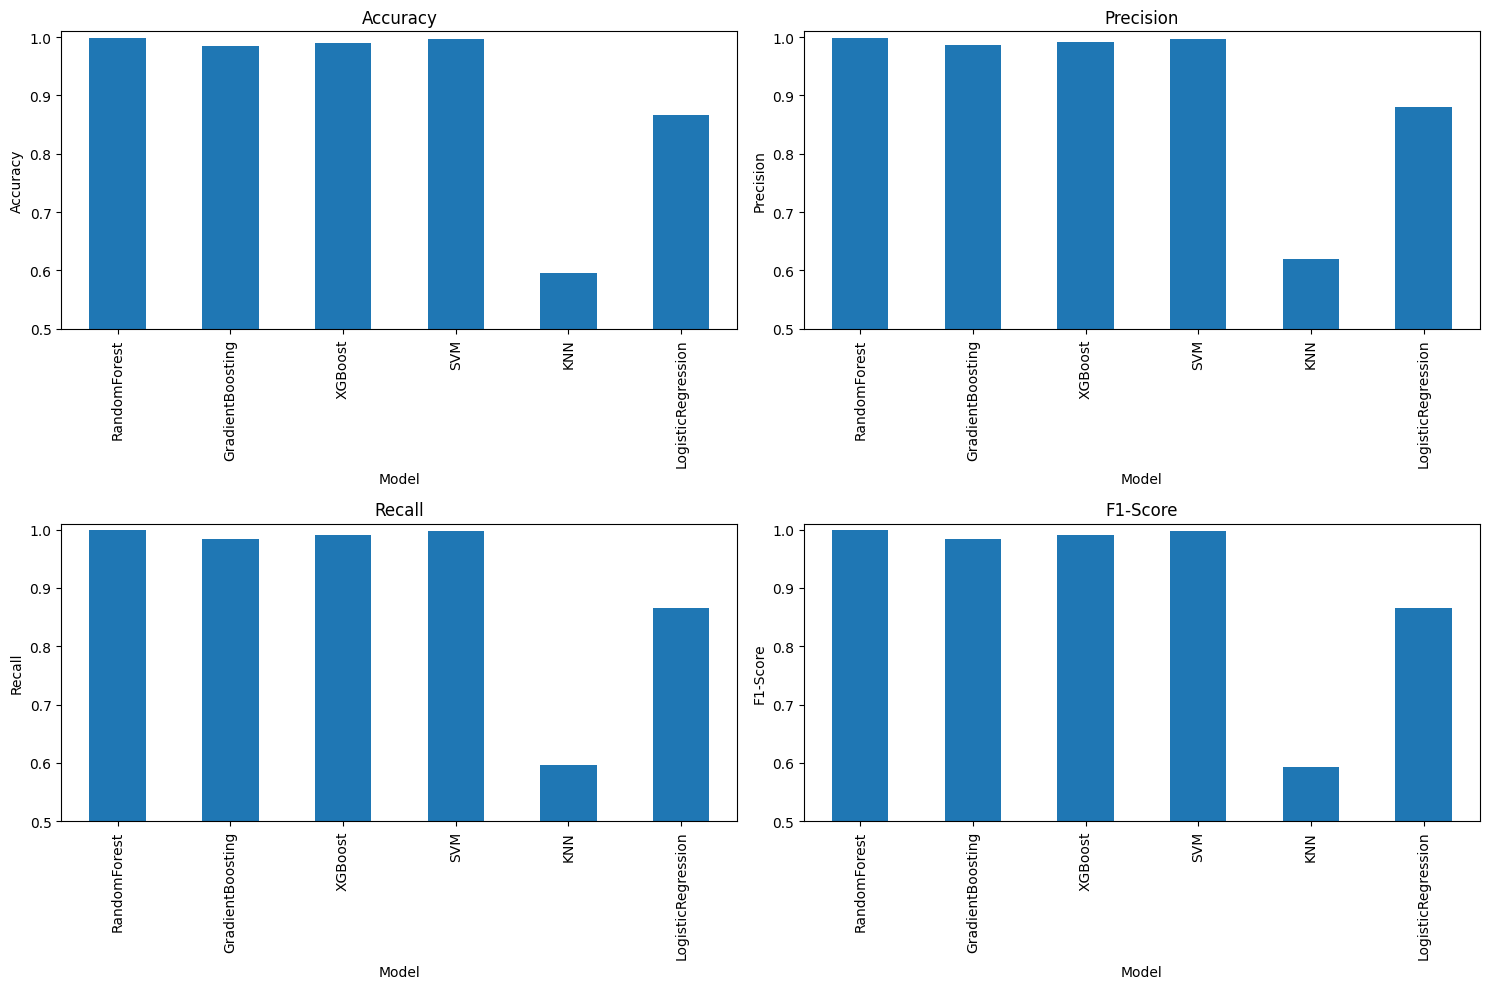

In [ ]:
# Print final results
print()
print(metrics_df)
print()
plot_metrics()


In [ ]:
print(list(x_test.iloc[0]))
len(list(x_test.iloc[0]))

[1.0, 4.0, 0.2612808157818385, 0.14458940367526435, 0.4420264691668622, 0.43040874562656783, 0.8992496717019621, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


28